In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
# loading the Califonia housing Dataset
cal_housing = fetch_california_housing()
X = cal_housing.data
y = cal_housing.target

In [6]:
# clean the data
df = pd.DataFrame(X, columns=cal_housing.feature_names)
df['target'] = y
print(df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


In [13]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


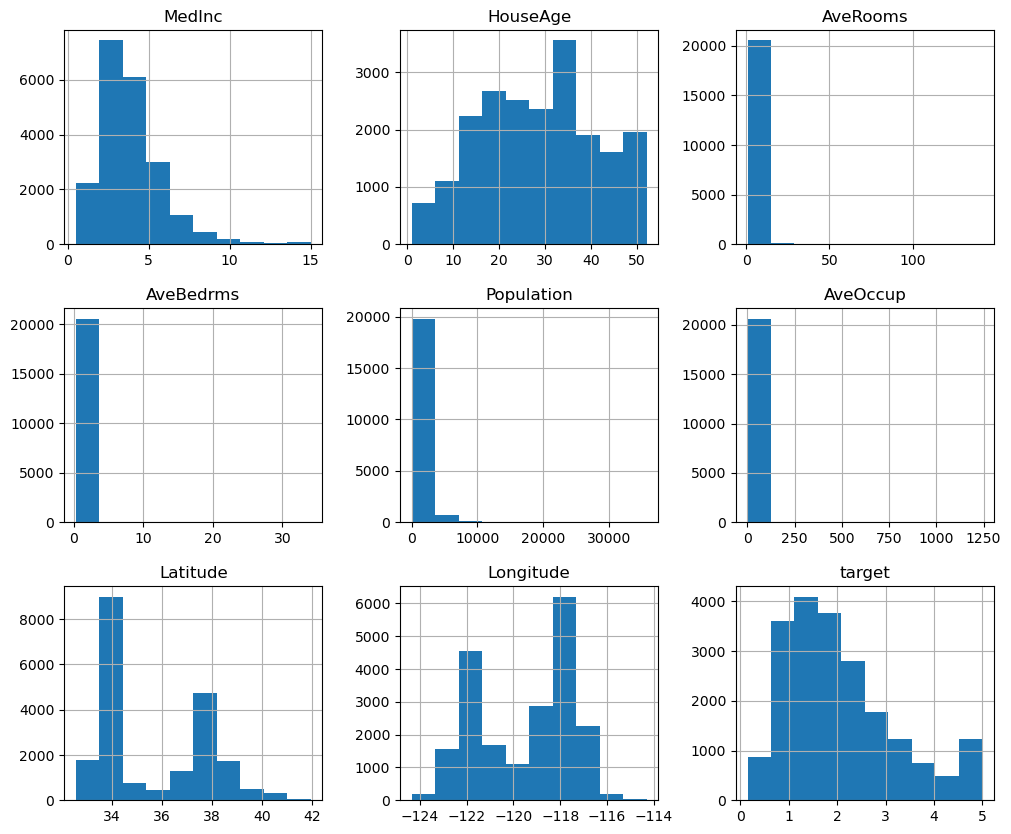

In [8]:
# no null values so data is good, we can now visualize the data with histograms
df.hist(figsize=(12, 10))
plt.show()


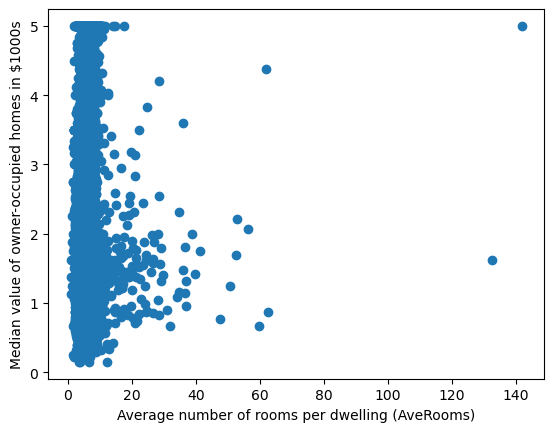

In [9]:
# Visualize the data using scatter plots
plt.scatter(df['AveRooms'], df['target'])
plt.xlabel('Average number of rooms per dwelling (AveRooms)')
plt.ylabel('Median value of owner-occupied homes in $1000s')
plt.show()


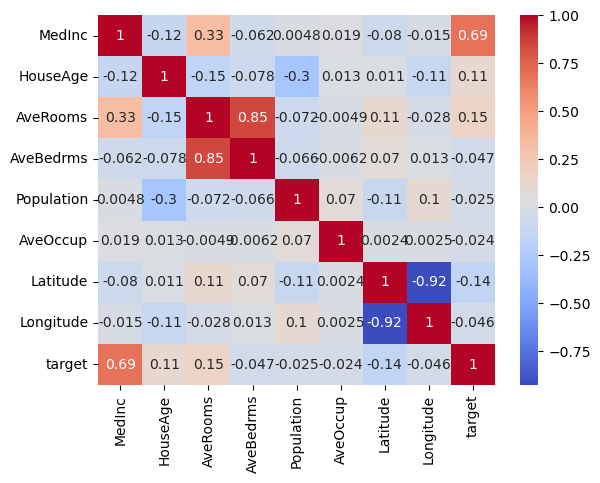

In [10]:
# Visualize the data using a correlation matrix heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Evaluation function
def model_eval(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    return mae, mse, rmse, r2

In [15]:
# Implement Simple Linear Regression
lin_regressor = LinearRegression()
lin_regressor.fit(X_train[:, np.newaxis, 2], y_train) # using AveRooms on index 2
lin_regressor_metrics = model_eval(lin_regressor, X_test[:, np.newaxis, 2], y_test)

In [16]:
# Implement Multiple Linear Regression
multiple_regressor = LinearRegression()
multiple_regressor.fit(X_train, y_train)
multiple_regressor_metrics = model_eval(multiple_regressor, X_test, y_test)

In [ ]:
# Implement Polynomial Regression (use the same Linear Regression model with transformed features)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_lin_regressor = LinearRegression()
poly_lin_regressor.fit(X_train_poly, y_train)
poly_lin_regressor_metrics = model_eval(poly_lin_regressor, X_test_poly, y_test)

In [18]:
# Implement Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_metrics = model_eval(ridge, X_test, y_test)

In [19]:
# Implement Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_metrics = model_eval(lasso, X_test, y_test)

In [20]:
# Implement Support Vector Regression
svr = SVR(kernel='linear', C=1.0)
svr.fit(X_train, y_train)
svr_metrics = model_eval(svr, X_test, y_test)

In [21]:
# Implement Decision Tree Regression
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)
dtree_metrics = model_eval(dtree, X_test, y_test)

In [22]:
# Implement Random Forest Regression
rforest = RandomForestRegressor(n_estimators=100)
rforest.fit(X_train, y_train)
rforest_metrics = model_eval(rforest, X_test, y_test)

In [25]:
# Random Forest example
from scipy.stats import randint
param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': randint(1, 30),
    'min_samples_split': randint(2, 10)
}
rforest = RandomForestRegressor(random_state=38)
random_search = RandomizedSearchCV(estimator=rforest, param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=38)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=38),
                   n_iter=50,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002B0C9662FB0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002B0CA671EA0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002B0C947D0F0>},
                   random_state=38, scoring='neg_mean_squared_error')

In [26]:
print("Best hyperparameters for Random Forest:", random_search.best_params_)
print("Best score for Random Forest:", -random_search.best_score_)

Best hyperparameters for Random Forest: {'max_depth': 22, 'min_samples_split': 2, 'n_estimators': 138}
Best score for Random Forest: 0.2608969023869772


In [27]:
# Retrain the model with the best hyperparameters
best_rforest = random_search.best_estimator_
best_rforest.fit(X_train, y_train)
best_rforest_metrics = model_eval(best_rforest, X_test, y_test)

In [28]:
# Collect the evaluation metrics for each model in a DataFrame
model_names = ['Simple LR', 'Multiple LR', 'Polynomial LR', 'Ridge', 'Lasso', 'SVR', 'Decision Tree', 'Random Forest', 'Tuned Random Forest']
metrics_list = [lin_regressor_metrics, multiple_regressor_metrics, poly_lin_regressor_metrics, ridge_metrics, lasso_metrics, svr_metrics, dtree_metrics, rforest_metrics, best_rforest_metrics]


In [29]:
results = pd.DataFrame(metrics_list, columns=['MAE', 'MSE', 'RMSE', 'R2'], index=model_names)
print(results)

                          MAE       MSE      RMSE        R2
Simple LR            0.889149  1.292331  1.136808  0.013795
Multiple LR          0.533200  0.555892  0.745581  0.575788
Polynomial LR        0.467001  0.464301  0.681397  0.645682
Ridge                0.533204  0.555803  0.745522  0.575855
Lasso                0.581607  0.613512  0.783270  0.531817
SVR                  0.590038  0.629607  0.793478  0.519534
Decision Tree        0.455802  0.502210  0.708668  0.616753
Random Forest        0.326810  0.253648  0.503635  0.806436
Tuned Random Forest  0.326932  0.255109  0.505083  0.805321


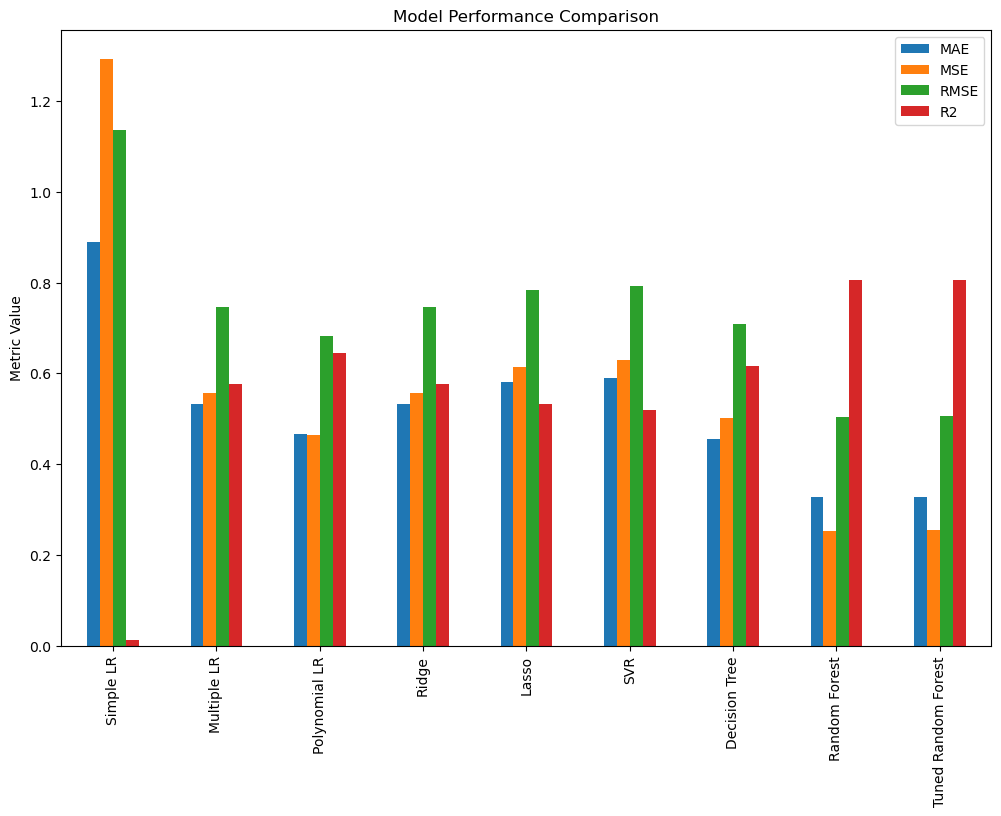

In [30]:
results.plot(kind='bar', figsize=(12, 8), ylabel='Metric Value', title='Model Performance Comparison')
plt.show()

In [31]:
best_model = best_rforest

In [32]:
best_model.fit(X, y)

RandomForestRegressor(max_depth=22, n_estimators=138, random_state=38)

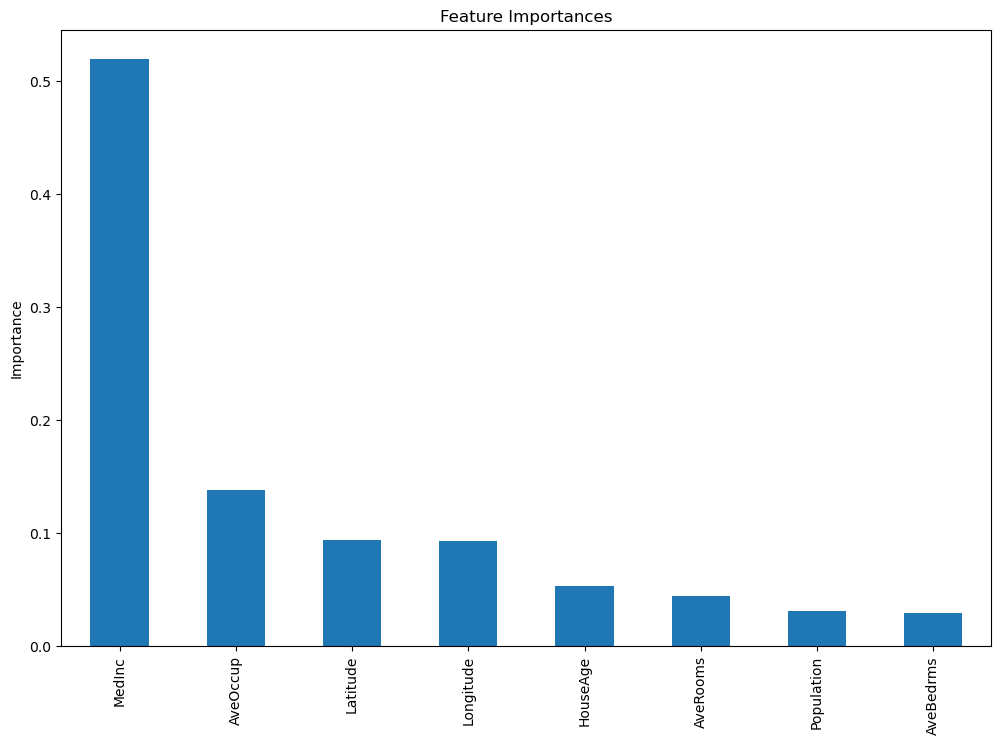

In [33]:
# Analyze feature importances for the Random Forest model
importances = best_model.feature_importances_
feature_importances = pd.Series(importances, index=cal_housing.feature_names)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), ylabel='Importance', title='Feature Importances')
plt.show()